# Michael Lyken #
___COGS 18 Final Project___
## A15248046 ##

## Overview
My project will be one of Data Analysis. I went ahead and scraped data from IMDb and specified for the years of 2010-2019 and chose highest rating and took the first 100. Following, this project will take a text file of movie names from this specific period and analyze the trends of which year, genre and movie were the best. Enjoy!

In [1]:
import string
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv("IMDB_Titles.csv")
file

,Title,Year,Genre,Rating (Of 10)
0,Uncut Gems (2019),2019,"Crime, Drama, Thriller",7.5
1,Snowpiercer (2013),2013,"Action, Drama, Sci-Fi",7.1
2,Joker (2019),2019,"Crime, Drama, Thriller",8.5
3,Ready or Not (I) (2019),2019,"Comedy, Horror, Mystery",6.8
4,Once Upon a Time... in Hollywood (2019),2019,"Comedy, Drama",7.7
...,...,...,...,...
95,Toy Story 4 (2019),2019,"Animation, Adventure, Comedy",7.8
96,Shazam! (2019),2019,"Action, Adventure, Comedy",7.1
97,Code 8 (2019),2019,"Action, Crime, Drama",6.1
98,John Wick: Chapter 3 - Parabellum (2019),2019,"Action, Crime, Thriller",7.5


In [3]:
titles = file.Title.unique()
years = file['Year']
years.head()

0    2019
1    2013
2    2019
3    2019
4    2019
Name: Year, dtype: int64

In [4]:
initial = list(file['Year'])
type(initial[0])

int

In [5]:
genre1 = list(file['Genre'])
type(genre1[0])

str

In [6]:
def count_genre(genre1):
    count = {} 
    #new dictionary for the count to be updated to
    for i in genre1: 
        # loops through and counts each specific genre
        count[i] = count.get(i, 0) + 1
    return count
freq_g = count_genre(genre1)

In [7]:
new_dict = {key:val for key, val in freq_g.items() if val > 3}
new_dict

{'Action, Adventure, Fantasy': 5,
 'Action, Adventure, Sci-Fi': 10,
 'Drama, Romance': 4,
 'Action, Adventure, Comedy': 8}

In [8]:
def count_year(initial):
    count = {} 
    # creates empty dictionary for values
    for i in initial: 
        # counts how many times a year is present and stores its value
        count[i] = count.get(i, 0) + 1
    return count
freq_y = count_year(initial)

In [25]:
import re
def remove_year(titles):
    #defining a pattern of numbers we are looking for
    pattern = '[0-9]'
    # looping through titles and replacing all numbers with a blank space.
    updated = [re.sub(pattern, '', i) for i in titles] 
    return updated
#define new titles as the updated

new_titles = remove_year(titles)
new_titles

list

In [38]:
def remove_extras(new_titles):
    #function called to remove extra parenthesis
    str1 = []
    for i in new_titles:
        updated_titles = i.replace('()','')
        str1.append(updated_titles)
    return str1
updated_titles = remove_extras(new_titles)

['Uncut Gems ',
 'Snowpiercer ',
 'Joker ',
 'Ready or Not (I) ',
 'Once Upon a Time... in Hollywood ',
 'The Gentlemen ',
 'Parasite ',
 ' ',
 'Knives Out ',
 'Rocketman (I) ',
 'Avengers: Endgame ',
 'Star Wars: Episode IX - The Rise of Skywalker ',
 'Justice League ',
 'The Lodge ',
 'Midsommar ',
 'Jojo Rabbit ',
 ' Just Go with It ',
 'The Last Airbender ',
 '. The Vast of Night ',
 'Fast & Furious Presents: Hobbs & Shaw ',
 'The Platform ',
 'Inception ',
 'I See You (II) ',
 'Interstellar ',
 'Little Women ',
 'The Lighthouse (I) ',
 'Maleficent: Mistress of Evil ',
 'Suicide Squad ',
 'Jumanji: The Next Level ',
 'Mad Max: Fury Road ',
 'Alita: Battle Angel ',
 'Hustlers ',
 'Bad Education ',
 'Django Unchained ',
 'Blood Machines ',
 'Ford v Ferrari ',
 'Captain America: The First Avenger ',
 'The Wretched ',
 ' The Irishman ',
 'Midway ',
 'Contagion ',
 'Doctor Sleep ',
 'Avengers: Infinity War ',
 'The Lion King ',
 'The VelociPastor ',
 'Bombshell ',
 'The Wolf of Wall Str

# Finding the highest rated movie

In [11]:
# Not a function but serves as a finder for the highest rated film
rating1 = file.drop(columns = ['Genre','Year'])
rating_list = rating1.values.tolist()
sorted_r = sorted(rating_list)
sorted_r[50]

['Inception (2010)', 8.8]

In [12]:
# returns a list of the individual ratings in the order they were recorded
rating = list(file['Rating (Of 10)'])

In [13]:
def count_rating(rating):
    count = {} 
    # creates an empty dictionary
    for i in rating: 
        # counts each individual occurence of a rating per film
        count[i] = count.get(i, 0) + 1
    return count
freq_r = count_genre(rating)
freq_r

{7.5: 5,
 7.1: 4,
 8.5: 2,
 6.8: 5,
 7.7: 4,
 7.9: 8,
 8.6: 2,
 8.3: 1,
 7.3: 5,
 8.4: 3,
 6.7: 4,
 6.4: 4,
 6.1: 4,
 4.1: 1,
 6.5: 2,
 7.0: 4,
 8.8: 1,
 7.6: 5,
 6.6: 3,
 6.0: 2,
 8.1: 8,
 6.3: 1,
 6.9: 5,
 5.8: 1,
 7.4: 3,
 5.2: 1,
 8.2: 2,
 8.0: 4,
 7.2: 2,
 6.2: 1,
 2.7: 1,
 5.4: 1,
 7.8: 1}

In [14]:
# Searching to isolate values that are the highest rated
rating_dict = {key:val for key, val in freq_r.items() if key > 8.0}
rating_dict

{8.5: 2, 8.6: 2, 8.3: 1, 8.4: 3, 8.8: 1, 8.1: 8, 8.2: 2}

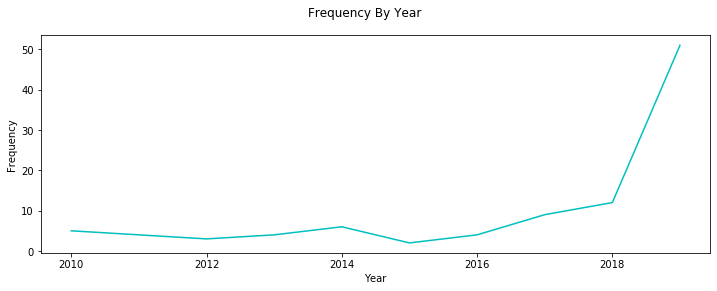

In [15]:
# Plot of our graph for frequency by year
lists = sorted(freq_y.items())
x,y = zip(*lists)
x,y

plt.figure(figsize = (12,4))
plt.plot(x,y, color = 'c')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.suptitle('Frequency By Year')
plt.show()


## From this we can see that there was an increase around 2018 of movies that made it to the top 100 list.

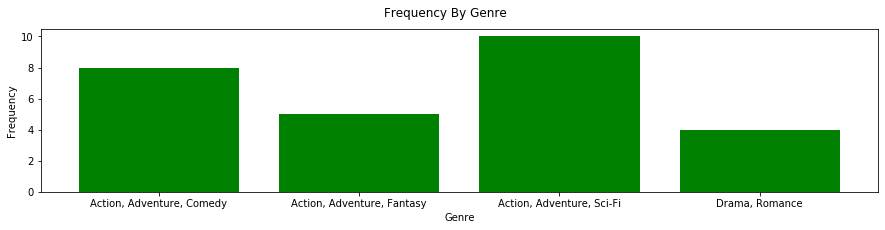

In [16]:
# plot of graph for frequency by genre
lists = sorted(new_dict.items())
x,y = zip(*lists)
x,y
plt.figure(figsize = (15,3))
plt.bar(x,y,facecolor = 'g')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.suptitle('Frequency By Genre')
plt.show()

## From this we see that the Genre which had the highest frequency on our top 100 list was, Action,Adventure,and Sci-Fi

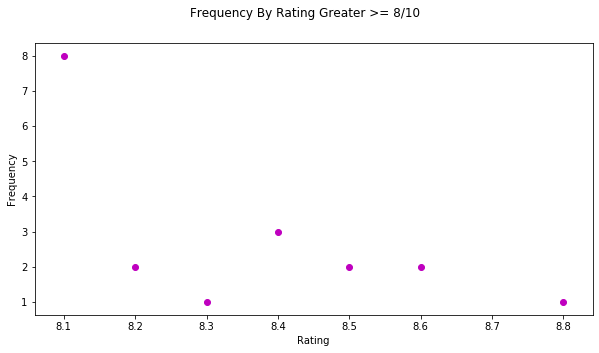

In [17]:
#Isolating the highest rated films and how many there were
lists = sorted(rating_dict.items())
x,y = zip(*lists)
x,y
plt.figure(figsize = (10,5))
plt.scatter(x,y,facecolor = 'm')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.suptitle('Frequency By Rating Greater >= 8/10')
plt.show()

# From this graph we see that we only had one film rated at the max of an 8.8, which ended up being Inception as defined earlier!

#### Extra Credit (*optional*)


I started coding last year (2019) with Data science 10. It was a very challenging course at the time since I had never written a single line of code previously. With that being said I learned a lot of helpful tips and tricks about Python and how to use it in courses such as these; I look forward to getting to play with it more and learn from my experiments.
My project went above and beyond the requirements because I took it upon myself to scrape data from an unclean data source, cleaned it and loaded it into my project with no central guidance. Then took a very loose idea and went after an analysis uncertain if there was any to find. It was pretty challenging but I am glad that I took on this project. Lastly I learned better ways to scrape data and clean it.